In [41]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [156]:
df

,date,ID,S1A,S1,S2,S3,S4A1,S4A2,S5,S6,...,DE2,DE3,DE4,DE5,DE6,DE7,DE8,DE9,RWT,RWT1
0,20211101,1,49,7,5,1997,3,5,6,5,...,7,2,1,4,5,5,5,3,81.199824,0.576738
1,20211101,2,49,7,6,1997,3,5,6,5,...,7,2,1,4,5,5,6,3,46.309378,0.328921
2,20211101,3,49,7,8,2000,7,0,6,5,...,7,1,1,5,5,5,8,3,32.626052,0.231733
3,20211101,4,90,9,5,1975,2,0,4,3,...,9,1,3,3,4,3,5,2,50.119167,0.355981
4,20211101,5,119,10,8,1973,0,9,7,3,...,10,1,3,1,5,3,8,2,31.289328,0.222239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,20211101,2496,1,1,1,1979,2,3,4,4,...,1,2,3,3,4,4,1,2,101.277910,0.719346
2496,20211101,2497,1,1,1,1981,4,3,4,4,...,1,2,2,5,4,4,1,3,102.610748,0.728813
2497,20211101,2498,1,1,1,1978,2,4,1,3,...,1,2,3,3,1,3,1,2,101.277910,0.719346
2498,20211101,2499,1,1,1,1969,1,4,3,4,...,1,2,4,2,3,4,1,2,428.626238,3.044402


In [42]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [43]:
import pandas as pd

df = pd.read_excel("/content/8. 2020 서울서베이 외국인(원시자료와 부호화 지침서).xlsx")
df.to_csv("/content/8. 2020 서울서베이 외국인(원시자료와 부호화 지침서).csv")

In [44]:
#컬럼 이름 변경
f = open("/content/설문조사 라벨.txt", "r")

lines = f.readlines()
new_columns=[]
new_columns_name=[]
for line in lines:

  if len(line)<3 : continue; 
  elif line[-1] == "\n" and line[-2] == '\t':
      line=line[:-2]
  elif line[-1] == '\n':
      line=line[:-1]
  new_column = line.split(':')

  new_columns.append(new_column[0])
  new_columns_name.append(new_column[1])
f.close()

In [45]:
# columns_drop=['date', 'ID', 'S1A', 'Q6A1', 'Q6A2', 'Q6A3', 'Q6A4', 'Q6A5', 'Q6A6', 'Q6A7', 'Q9', 'Q10A1', 'Q10A2', 'Q10A3', 'Q10A4', 'Q10A5',
#  'Q10A6', 'Q10A7', 'Q10A8', 'Q13A1', 'Q13A2', 'Q13A3', 'Q17A01', 'Q17A02', 'Q17A03', 'Q17A04', 'Q17A05', 'Q17A06', 'Q17A07', 'Q17B', 
#  'Q27A','DE1', 'DE2', 'DE3', 'DE4', 'DE5', 'DE6', 'DE7', 'DE8', 'DE9','RWT', 'RWT1','Q18A1','Q18A2','Q18A3','Q18A4','Q20A1','Q20A2','Q21','Q21A','Q22','Q23A1','Q23A2']

In [46]:
# for i in range(len(df3.columns)):
#   print(df3.columns[i],'  ',df3.isna().sum().tolist()[i])

In [47]:
import numpy as np

#필요한 컬럼만 추출
df2=df[new_columns]
#컬럼이름병경
df2.columns=new_columns_name

In [48]:
# print(df2['우울감요인(1순위)'].value_counts(),'\n')
# print(df2['우울감요인(2순위)'].value_counts(),'\n')
index1 = df2['우울감요인(1순위)'].value_counts().index
index2 = df2['우울감요인(2순위)'].value_counts().index
a=[]
for i in range(9):
  for j in range(9):
    if index1[i]==index2[j]:
      a.append(df2['우울감요인(1순위)'].value_counts().values[i]+df2['우울감요인(2순위)'].value_counts().values[j])
a

[839, 596, 1019, 676, 456, 519, 444, 163, 37]

In [49]:
np.sort(df2['스트레스(2순위)'].unique())[:10]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

In [50]:
# for i in df3.columns:
#  print(df3[i].unique())
import numpy as np

#필요한 컬럼만 추출
df2=df[new_columns]
#컬럼이름병경
df2.columns=new_columns_name

em_change=np.sort(df2['고용변화'].unique())
country=np.sort(df2['국적'].unique())
bisa=np.sort(df2['체류자격'].unique())
house=np.sort(df2['주거형태'].unique())
sex=np.sort(df2['성별'].unique())
job=np.sort(df2['직업'].unique())
em_role=np.sort(df2['고용형태'].unique())
grade=np.sort(df2['학력'].unique())
depress=np.sort(df2['우울감요인(1순위)'].unique())[:9]
depress2=np.sort(df2['우울감요인(2순위)'].unique())[:9]
stress=np.sort(df2['스트레스(1순위)'].unique())[:10]
stress2=np.sort(df2['스트레스(2순위)'].unique())[:10]

categories=[em_change,country,bisa,house,sex,job,em_role,grade,depress,depress2,stress,stress2]
categories2=['고용변화','국적','체류자격','주거형태','성별','직업','고용형태','학력','우울감요인(1순위)','우울감요인(2순위)','스트레스(1순위)','스트레스(2순위)']

In [51]:
#수치형 데이터를 범주형으로 변경
em_change_new=['해당없음','임금증가','휴직이나 임금감소','해고','변화없음(근로자)','매출 증가','영업시간 단축/휴업 및 매출감소','폐업','변화없음(사장)','구직 어려움으로 인한 실업 기간 연장','변화없음(실업자)','구직 어려움으로 인한 실업 기간 연장','변화없음(비취업자)']
country_new=['한국계중국인','중국','일본','타이완','베트남','아시아' '기타','미국','영미권' '기타','유럽권','기타']
bisa_new=['방문취업', '전문인력','유학', '방문동거/거주/동반','재외동포','영주자','결혼이민자', '기타']
house_new=['① 단독주택(다가구포함)' ,'② 아파트', '③ 다세대주택', '④ 연립주택/빌라','⑤ 오피스텔', '⑥ 일터, 고시원, 쉼터' ,'⑦ 기타(상가내 거처 등)']
sex_new=['남','녀']
job_new=['① 관리자', '② 전문가 및 관련 종사자','③ 사무 종사자', '④ 서비스 종사자','⑤ 판매 종사자', '⑥ 농림어업 종사자',
'⑦ 기능원 및 관련 기능 종사자','⑧ 장치․기계 조작 및 조립 종사자','⑨ 단순노무 종사자', '⑩ 학생(문27로)','⑪ 주부(문27로)',' ⑫ 무직(문27로)']
em_role_new=['상용직 임금근로자', '임시직 임금근로자', '일용직 임금근로자', '특수고용종사자', '고용원이 있는 자영업자' ,'고용원이 없는 자영업자', '무급가족종사자','기타']
grade_new=['① 안 받았음','② 초등학교','③ 중학교','④ 고등학교','⑤ 대학(4년제 미만)','⑥ 대학교(4년제 이상)','⑦ 대학원 석사 과정','⑧ 대학원 박사 과정']
depress_new=['① 코로나19 관련 언론 보도' ,'② 감염에 대한 막연한 불안','③ 빈번히 울리는 긴급재난문자','④ 외출 자제로 인한 갑갑함','⑤ 사회적 거리두기에 따른 관계단절 및 소통감소',
         '⑥ 소득 및 지출 감소에 따른 스트레스','⑦ 확인되지 않은 가짜뉴스로 인한 혼란','⑧ 모국방문, 가족/친구의 출입국에 제한','⑨ 기타']
depress2_new=['① 코로나19 관련 언론 보도' ,'② 감염에 대한 막연한 불안','③ 빈번히 울리는 긴급재난문자','④ 외출 자제로 인한 갑갑함','⑤ 사회적 거리두기에 따른 관계단절 및 소통감소',
         '⑥ 소득 및 지출 감소에 따른 스트레스','⑦ 확인되지 않은 가짜뉴스로 인한 혼란','⑧ 모국방문, 가족/친구의 출입국에 제한','⑨ 기타']
stress_new=['① 건강상태(본인 혹은 가족)','② 재정상태', '③ 가족과의 관계','④ 외국인(모국인 포함) 친구와의 관계','⑤ 한국인 친구와의 관계','⑥ 직장, 학교 등 사회생활에서의 한국인과의 대인관계',
            '⑦ 과도한 업무/과도한 학습량', '⑧ 실업','⑨ 가정관리(가사업무, 가족 돌보기 등)','⑩ 기타']         
stress2_new=['① 건강상태(본인 혹은 가족)','② 재정상태', '③ 가족과의 관계','④ 외국인(모국인 포함) 친구와의 관계','⑤ 한국인 친구와의 관계','⑥ 직장, 학교 등 사회생활에서의 한국인과의 대인관계',
            '⑦ 과도한 업무/과도한 학습량', '⑧ 실업','⑨ 가정관리(가사업무, 가족 돌보기 등)','⑩ 기타']                 
categories3=[em_change_new,country_new,bisa_new,house_new,sex_new,job_new,em_role_new,grade_new,depress_new,depress2_new,stress_new,stress2_new]

In [52]:
for k in range(len(categories2)):
  for i in range(len(categories[k])):
    df2[categories2[k]][(df2[categories2[k]] == categories[k][i])] = categories3[k][i]
  # print(df2[categories2[k]].value_counts(),'\n')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [53]:
df2['체류기간']=df2['체류기간(년)']*12 + df2['체류기간(월)']
df2['출근/등교시간']=df2['출근/등교시간(시)'] + df2['출근/등교시간(분)']/60
df2['한국어능력'] = df2['말하기(능력)'] + df2['읽기'] + df2['쓰기'] + df2['듣기']
df2['사회환경점수'] = df2['주거환경(삶의 질)']+df2['경제환경']+df2['복지환경']+df2['사회환경']+df2['교육환경']+df2['도시안전']
df2['한국적응어려움']=df2['언어(어려움)']+df2['자녀 양육 및 교육']+df2['한국식 생활 문화 적응']+df2['음식']+df2['외국인에 대한 사회적 편견, 차별']+df2['경제 활동 기회 획득']
+df2['한국인과의 원활한 유대 관계 맺기']+df2['공공 행정 기관을 통한 민원 제기 및 해결']+df2['지식 및 기술 습득을 위한 교육 기회 획득']
+df2['의료 기관 이용']+df2['주택 등 주거 공간']
df2['행복지수']=df2['건강상태(행복지수)']+df2['재정']+df2['사람관계']+df2['가정생활']+df2['사회생활']

df2 = df2.drop(columns = ['체류기간(년)', '체류기간(월)','출근/등교시간(시)', '출근/등교시간(분)','말하기(능력)', '읽기','쓰기','듣기','주거환경(삶의 질)', '경제환경',
                          '복지환경','사회환경','교육환경','도시안전','언어(어려움)','자녀 양육 및 교육','한국식 생활 문화 적응','음식','외국인에 대한 사회적 편견, 차별',
                          '경제 활동 기회 획득','한국인과의 원활한 유대 관계 맺기','공공 행정 기관을 통한 민원 제기 및 해결','지식 및 기술 습득을 위한 교육 기회 획득',
                          '건강상태(행복지수)','재정','사람관계','가정생활','사회생활','의료 기관 이용','주택 등 주거 공간']) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [54]:
drop=df2.loc[df2['우울감요인(1순위)'].isnull()==True]
df2.drop(drop.index,inplace=True)

In [55]:
df2.isnull().sum()

국적              0
체류자격            0
출생년도            0
주거형태            0
보증금           560
월세            934
성별              0
스트레스정도          0
스트레스(1순위)     745
스트레스(2순위)     845
건강상태            0
우울지표            0
우울감요인(1순위)      0
우울감요인(2순위)     51
고용변화            0
직업              0
고용형태          876
월평균소득         876
학력              0
체류기간            0
출근/등교시간       549
한국어능력           0
사회환경점수          0
한국적응어려움         0
행복지수            0
dtype: int64

In [56]:
df2.loc[df2['우울감요인(1순위)'].isnull()==True][['우울감요인(1순위)']]

,우울감요인(1순위)


([<matplotlib.axis.XTick at 0x7fa444a7e3d0>],
 <a list of 1 Text xticklabel objects>)

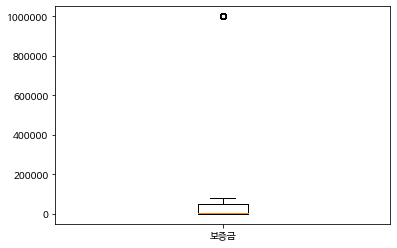

In [57]:
import matplotlib.pyplot as plt
plt.boxplot(df2['보증금'].fillna(df2['보증금'].mean()).values)
plt.xticks([1], ['보증금'])

In [58]:
#이상치를 평균으로 대체
df2.월세.loc[df2.월세>=200]=df2.월세.mean()
df2.보증금.loc[df2.보증금>99999]=df2.보증금.mean()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/local/lib/python3.7/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


6.34625


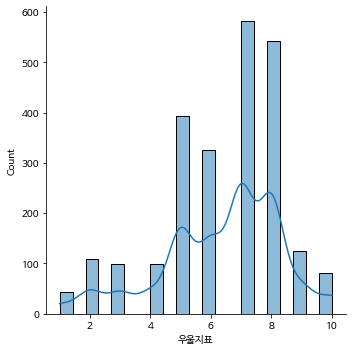

In [59]:
%matplotlib inline
import seaborn as sns
print(df2.우울지표.mean())
sns.displot(df2.우울지표, kde=True);

In [60]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# colormap = plt.cm.PuBu
# plt.figure(figsize=(15, 15))
# plt.title("Person Correlation of Features", y = 1.05, size = 15)
# sns.set(font_scale=2) 
# sns.heatmap(df2.corr().sort_values('우울지표',axis=1), linewidths = 0.1, vmax = 1.0,
#            square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 12.5})

In [61]:
# #타겟과 상관관계
# despress = df2.corr()['우울지표'].sort_values(ascending=False)[1:]

# importances = pd.Series(despress.values, despress.index)


# plt.figure(figsize=(15,10))
# plt.title('우울지표와 특성의 상관관계')
# importances.sort_values().plot.barh();

In [62]:
df3=df2
df2.columns

Index(['국적', '체류자격', '출생년도', '주거형태', '보증금', '월세', '성별', '스트레스정도', '스트레스(1순위)',
       '스트레스(2순위)', '건강상태', '우울지표', '우울감요인(1순위)', '우울감요인(2순위)', '고용변화', '직업',
       '고용형태', '월평균소득', '학력', '체류기간', '출근/등교시간', '한국어능력', '사회환경점수', '한국적응어려움',
       '행복지수'],
      dtype='object')

In [63]:
df2.head().T

,3,5,6,7,8
국적,유럽권,기타,유럽권,유럽권,중국
체류자격,재외동포,기타,유학,유학,기타
출생년도,1975,1992,1998,2000,1981
주거형태,④ 연립주택/빌라,① 단독주택(다가구포함),⑤ 오피스텔,"⑥ 일터, 고시원, 쉼터",③ 다세대주택
보증금,300.0,300.0,5000.0,NaN,500.0
월세,70.0,50.0,65.0,NaN,40.0
성별,남,녀,녀,녀,남
스트레스정도,5,5,3,4,4
스트레스(1순위),"⑥ 직장, 학교 등 사회생활에서의 한국인과의 대인관계",② 재정상태,② 재정상태,"⑥ 직장, 학교 등 사회생활에서의 한국인과의 대인관계",① 건강상태(본인 혹은 가족)
스트레스(2순위),"⑨ 가정관리(가사업무, 가족 돌보기 등)",③ 가족과의 관계,⑦ 과도한 업무/과도한 학습량,⑦ 과도한 업무/과도한 학습량,② 재정상태


In [64]:
#훈련,테스트 세트 나누기
from sklearn.model_selection import train_test_split
target = df2['우울지표']
train, test = train_test_split(df2, train_size=0.70, test_size=0.30, 
                              stratify=target, random_state=2)

In [65]:
target = '우울지표'
features = train.columns.drop([target])

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [66]:
!pip install --upgrade category_encoders

In [140]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint
from category_encoders import TargetEncoder,OrdinalEncoder

pipe = make_pipeline(
      TargetEncoder()
    , SimpleImputer()
    , StandardScaler() 
    , SelectKBest(f_regression)
    , Ridge()
)

# 튜닝할 하이퍼파라미터의 범위를 지정해 주는 부분
dists = {
    'targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.], 
    'targetencoder__min_samples_leaf': randint(1, 10),     
    'simpleimputer__strategy': ['mean', 'median','most_frequent'], 
    'selectkbest__k': randint(1,24), 
    'ridge__alpha': randint(1,10), 
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=50, 
    cv=10,
    scoring='neg_mean_absolute_error',
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [141]:
print('최적 하이퍼파라미터: ', clf.best_params_)
print('MAE: ', -clf.best_score_)

최적 하이퍼파라미터:  {'ridge__alpha': 8, 'selectkbest__k': 8, 'simpleimputer__strategy': 'median', 'targetencoder__min_samples_leaf': 7, 'targetencoder__smoothing': 100.0}
MAE:  1.4794655021918017


In [142]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

model = clf.best_estimator_
y_pred = model.predict(X_train)

mae = mean_absolute_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f'테스트세트 MAE: {mae}')
print(f'테스트세트 R2 Score: {r2}')

테스트세트 MAE: 1.4391151953593446
테스트세트 R2 Score: 0.14359835349739758


In [87]:
model.named_steps['ridge'].coef_

array([0.35558724, 0.0930419 , 0.17570791, 0.12764579, 0.3186228 ,
       0.22942337, 0.20148126, 0.13290548, 0.16914343])

In [91]:
train.columns.drop([target])[:9]

Index(['국적', '체류자격', '출생년도', '주거형태', '보증금', '월세', '성별', '스트레스정도', '스트레스(1순위)'], dtype='object')

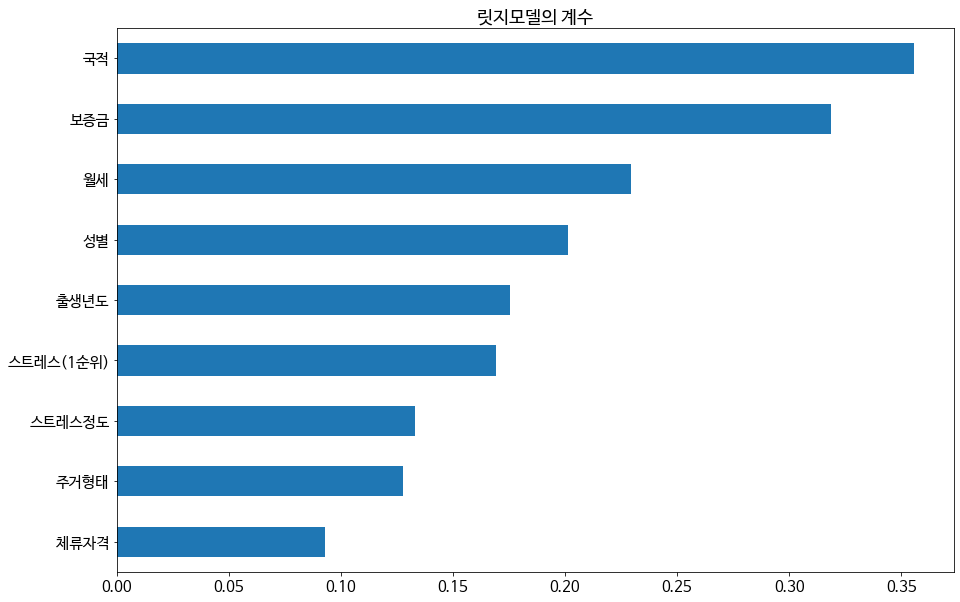

In [92]:
coefficients = model.named_steps['ridge'].coef_
importances2 = pd.Series(coefficients, train.columns.drop([target])[:9]).sort_values(ascending=False)

plt.figure(figsize=(15,10))
plt.rc('font', size=15)
plt.title(f'릿지모델의 계수')
plt.rc('font', family='NanumBarunGothic') 
importances2.sort_values()[:].plot.barh();

In [75]:
df2.columns

Index(['국적', '체류자격', '출생년도', '주거형태', '보증금', '월세', '성별', '스트레스정도', '스트레스(1순위)',
       '스트레스(2순위)', '건강상태', '우울지표', '우울감요인(1순위)', '우울감요인(2순위)', '고용변화', '직업',
       '고용형태', '월평균소득', '학력', '체류기간', '출근/등교시간', '한국어능력', '사회환경점수', '한국적응어려움',
       '행복지수'],
      dtype='object')

In [93]:
pip install eli5

In [94]:
!pip install PDPbox

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.preprocessing import StandardScaler
from scipy.stats import uniform, randint
from category_encoders import TargetEncoder,OrdinalEncoder,OneHotEncoder

In [96]:
from category_encoders import OrdinalEncoder
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder

# processor = make_pipeline(
#     OrdinalEncoder(), 
#     SimpleImputer(strategy='median')
# )

# X_train_processed = processor.fit_transform(X_train)
# X_val_processed = processor.transform(X_test)

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train) 
X_test_encoded = encoder.transform(X_test) 

boosting = XGBRegressor(
    n_estimators=1000,
    objective='reg:squarederror', # default
    max_depth = 10,
    cv=5,
    child_weight = 6,
    gamma = 0.5,
    learning_rate=0.2,
    scoring=' neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_test_encoded, y_test)]

boosting.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          early_stopping_rounds=50
         )

[0]	validation_0-rmse:5.06118	validation_1-rmse:5.06975
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:4.17253	validation_1-rmse:4.22829
[2]	validation_0-rmse:3.47411	validation_1-rmse:3.59544
[3]	validation_0-rmse:2.904	validation_1-rmse:3.10711
[4]	validation_0-rmse:2.44424	validation_1-rmse:2.76055
[5]	validation_0-rmse:2.09194	validation_1-rmse:2.50474
[6]	validation_0-rmse:1.80683	validation_1-rmse:2.31683
[7]	validation_0-rmse:1.56351	validation_1-rmse:2.18845
[8]	validation_0-rmse:1.37158	validation_1-rmse:2.10239
[9]	validation_0-rmse:1.23171	validation_1-rmse:2.03937
[10]	validation_0-rmse:1.12122	validation_1-rmse:1.99314
[11]	validation_0-rmse:1.03865	validation_1-rmse:1.96698
[12]	validation_0-rmse:0.946628	validation_1-rmse:1.94228
[13]	validation_0-rmse:0.881956	validation_1-rmse:1.92976
[14]	validation_0-rmse:0.84757	validation_1-rmse:1.92

XGBRegressor(child_weight=6, cv=5, gamma=0.5, learning_rate=0.2, max_depth=10,
             n_estimators=1000, n_jobs=-1, objective='reg:squarederror',
             scoring=' neg_mean_squared_error', verbose=1)

In [98]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_pred = boosting.predict(X_train_encoded)
r2 = r2_score(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)

print(f' MAE: {mae}')
r2_score(y_train, y_pred)

 MAE: 0.4121688404253551


0.9204091293594918

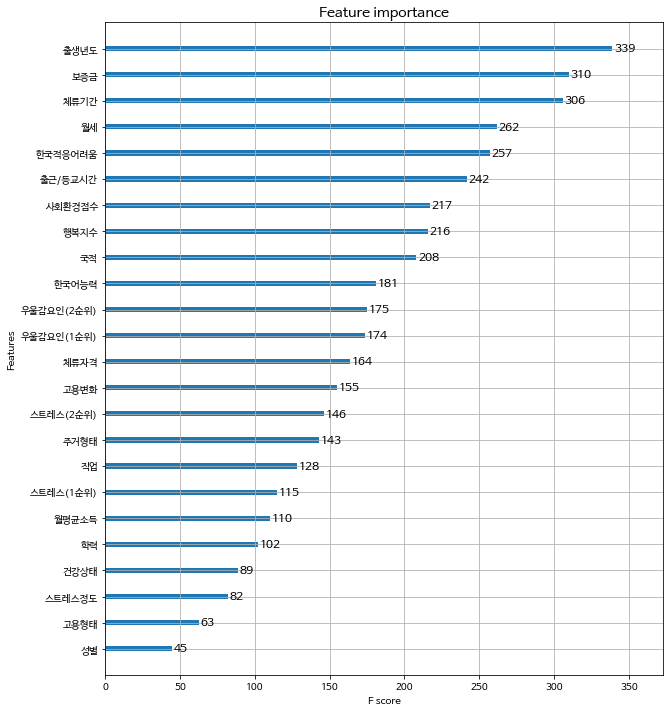

In [100]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize = (10, 12))
plt.rc('font', size=12)
plot_importance(boosting, ax = ax)

In [101]:
#결측치 평균으로 채우기
X_test_encoded=X_test_encoded.fillna(X_test_encoded.mean())

In [102]:
X_test_encoded.고용변화.value_counts()

2     273
4     171
1     128
3      63
8      22
7      18
5      16
10     16
6      10
9       2
12      1
Name: 고용변화, dtype: int64

In [103]:
X_test.고용변화.value_counts()

변화없음(근로자)               273
해당없음                    171
휴직이나 임금감소               128
구직 어려움으로 인한 실업 기간 연장     63
변화없음(비취업자)               22
변화없음(사장)                 18
해고                       16
임금증가                     16
영업시간 단축/휴업 및 매출감소        10
폐업                        2
매출 증가                     1
Name: 고용변화, dtype: int64

In [144]:
X_test_encoded['스트레스(1순위)'].value_counts()

3     245
7     182
5      96
2      46
6      36
11     35
9      30
4      21
10     11
8      11
1       7
Name: 스트레스(1순위), dtype: int64

In [154]:
X_test['스트레스(1순위)'].value_counts()

② 재정상태                           182
① 건강상태(본인 혹은 가족)                  96
⑦ 과도한 업무/과도한 학습량                  46
③ 가족과의 관계                         36
⑥ 직장, 학교 등 사회생활에서의 한국인과의 대인관계     35
④ 외국인(모국인 포함) 친구와의 관계             30
⑨ 가정관리(가사업무, 가족 돌보기 등)            21
⑤ 한국인 친구와의 관계                     11
⑧ 실업                              11
⑩ 기타                               7
Name: 스트레스(1순위), dtype: int64

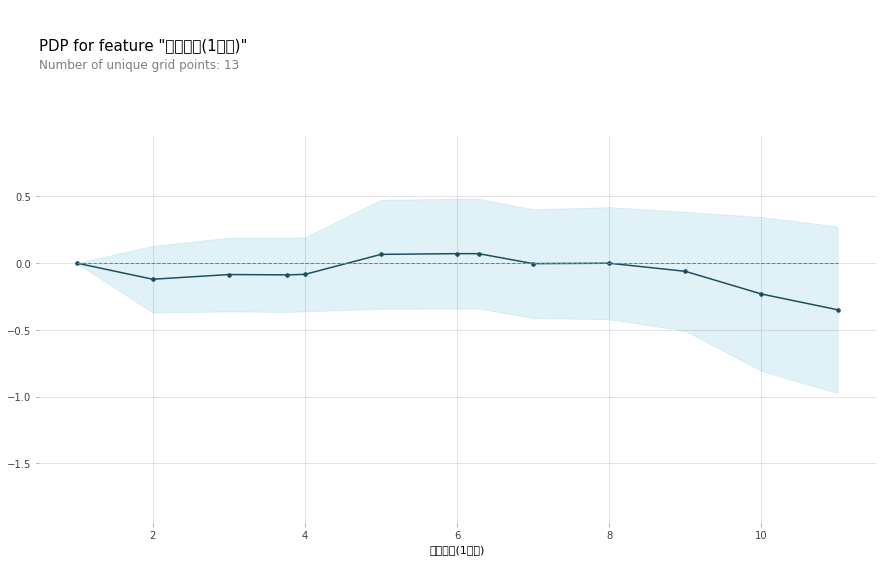

In [143]:
from pdpbox.pdp import pdp_isolate, pdp_plot, pdp_interact, pdp_interact_plot
feature = '스트레스(1순위)'

isolated = pdp_isolate(
    model=boosting, 
    dataset=X_test_encoded, 
    model_features=X_test.columns, 
    feature=feature,
    grid_type='percentile', # default='percentile', or 'equal'
    num_grid_points=100 # default=10
)
pdp_plot(isolated, feature_name=feature);

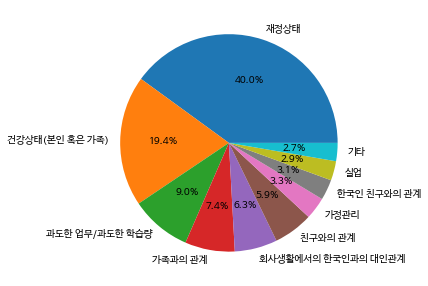

In [105]:
ratio = df.Q8A1.value_counts().values
labels = ['재정상태',
'건강상태(본인 혹은 가족)', '과도한 업무/과도한 학습량',
'가족과의 관계', '회사생활에서의 한국인과의 대인관계',
'친구와의 관계',
'가정관리', '한국인 친구와의 관계',
'실업',
'기타']

plt.rc('font', size=10)
plt.figure(figsize=(5,5))
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

In [106]:
df.Q8A1.value_counts()

2.0     681
1.0     331
7.0     154
3.0     126
6.0     108
4.0     100
9.0      56
5.0      52
10.0     49
8.0      46
Name: Q8A1, dtype: int64

In [107]:
X_test.고용변화.value_counts()

변화없음(근로자)               273
해당없음                    171
휴직이나 임금감소               128
구직 어려움으로 인한 실업 기간 연장     63
변화없음(비취업자)               22
변화없음(사장)                 18
해고                       16
임금증가                     16
영업시간 단축/휴업 및 매출감소        10
폐업                        2
매출 증가                     1
Name: 고용변화, dtype: int64

In [108]:
X_test_encoded.고용변화.value_counts()

2     273
4     171
1     128
3      63
8      22
7      18
5      16
10     16
6      10
9       2
12      1
Name: 고용변화, dtype: int64

In [109]:
df2['우울감요인(1순위)'].value_counts()

② 감염에 대한 막연한 불안               560
① 코로나19 관련 언론 보도              432
④ 외출 자제로 인한 갑갑함               416
⑧ 모국방문, 가족/친구의 출입국에 제한        292
③ 빈번히 울리는 긴급재난문자              245
⑥ 소득 및 지출 감소에 따른 스트레스         192
⑤ 사회적 거리두기에 따른 관계단절 및 소통감소    161
⑦ 확인되지 않은 가짜뉴스로 인한 혼란          77
⑨ 기타                           25
Name: 우울감요인(1순위), dtype: int64

In [110]:
df2.행복지수.mean()

34.725

In [111]:
X_test_encoded['우울감요인(2순위)'].value_counts()

3     197
7     105
6      97
5      95
8      79
4      60
2      53
9      17
1      12
10      5
Name: 우울감요인(2순위), dtype: int64

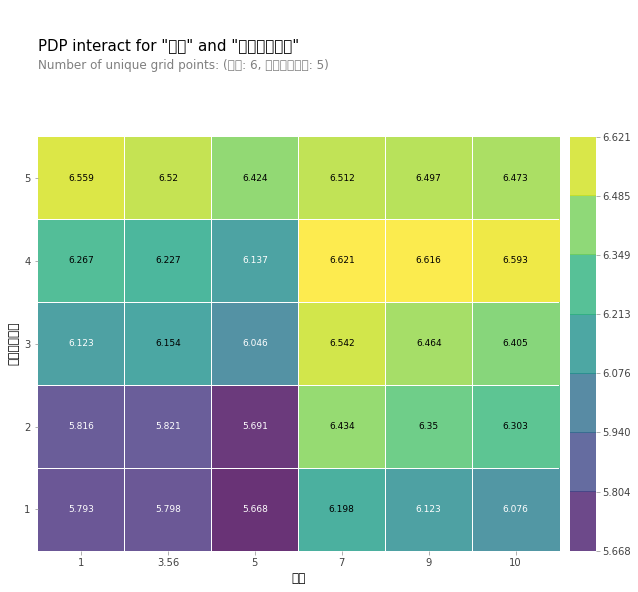

In [155]:
features = ['국적', '스트레스정도']

interaction = pdp_interact(
    model=boosting, 
    dataset=X_test_encoded,
    model_features=X_test.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', 
                  figsize=(10,10),
                  feature_names=features);

In [113]:
df2.groupby('성별').mean()[['우울지표']]

,우울지표
성별,
남,6.228645
녀,6.456084


In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline,Pipeline

# pipe = Pipeline([
#     ('preprocessing',make_pipeline(TargetEncoder(), SimpleImputer())),
#     ('rf',RandomForestRegressor(random_state=2))
# ])

pipe = Pipeline([
    ('preprocessing', make_pipeline(TargetEncoder(), SimpleImputer(),StandardScaler())),
    ('rf', RandomForestRegressor(random_state=2)) 
])

dists = {
    'preprocessing__targetencoder__smoothing': [2.,20.,50.,60.,100.,500.,1000.], 
    'preprocessing__targetencoder__min_samples_leaf': randint(1, 10),         
    'preprocessing__simpleimputer__strategy': ['mean', 'median','most_frequent'], 
    'rf__n_estimators': randint(50, 500), 
    'rf__max_depth': randint(0,30), 
    'rf__max_features': randint(0,50) # max_features
}

model3 = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=20, 
    cv=5, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

model3.fit(X_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [115]:
print('최적 하이퍼파라미터: ', model3.best_params_)
print('트레인세트MAE: ', -model3.best_score_)

최적 하이퍼파라미터:  {'preprocessing__simpleimputer__strategy': 'mean', 'preprocessing__targetencoder__min_samples_leaf': 1, 'preprocessing__targetencoder__smoothing': 20.0, 'rf__max_depth': 21, 'rf__max_features': 22, 'rf__n_estimators': 368}
트레인세트MAE:  1.4393608710543182


In [116]:
model3 = model3.best_estimator_

In [117]:
y_pred = model3.predict(X_train)

r2=r2_score(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)

print(f'테스트세트 MAE: {mae}')
r2

테스트세트 MAE: 0.530139298404753


0.8810855088178144

In [118]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance


# permuter 정의
permuter = PermutationImportance(
    model3.named_steps['rf'], # model
    scoring='neg_mean_absolute_error', # metric
    n_iter=50, # 다른 random seed를 사용하여 5번 반복
    random_state=2
)

# permuter 계산은 preprocessing 된 X_val을 사용합니다.
X_test_transformed = model3.named_steps['preprocessing'].transform(X_test)

# 실제로 fit 의미보다는 스코어를 다시 계산하는 작업입니다
permuter.fit(X_test_transformed, y_test);

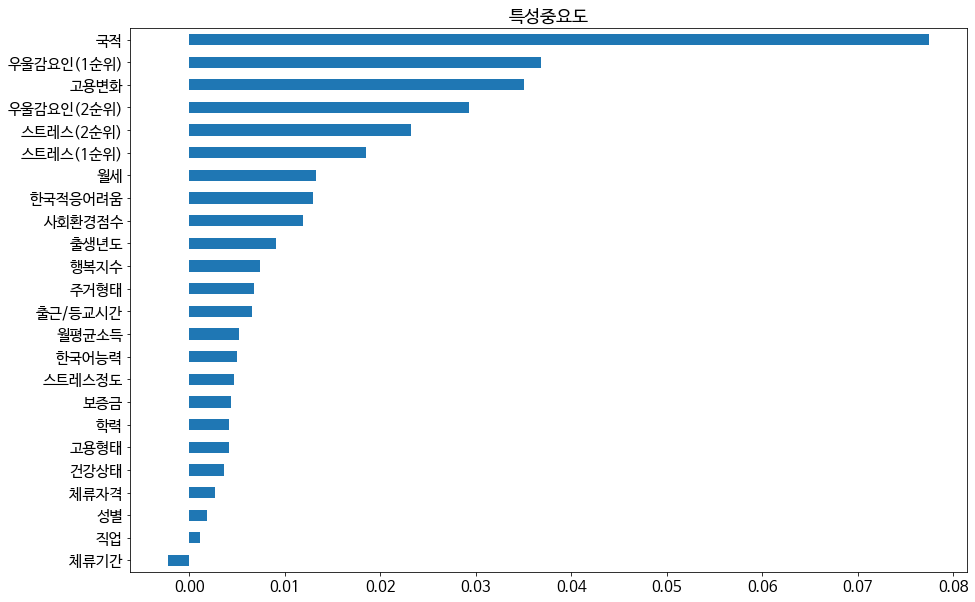

In [119]:
feature_names = X_test.columns.tolist()
importances = pd.Series(permuter.feature_importances_, feature_names).sort_values(ascending=False)

n = 24
plt.figure(figsize=(15,10))
plt.rc('font', size=15)
plt.title('특성중요도')
importances.sort_values()[-n:].plot.barh();

In [120]:
df2['고용변화'].value_counts()

변화없음(근로자)               878
해당없음                    572
휴직이나 임금감소               425
구직 어려움으로 인한 실업 기간 연장    206
변화없음(비취업자)               78
영업시간 단축/휴업 및 매출감소        60
변화없음(사장)                 56
임금증가                     51
해고                       46
변화없음(실업자)                16
폐업                       10
매출 증가                     2
Name: 고용변화, dtype: int64

In [121]:
!pip install shap

In [122]:
# processor = make_pipeline(
#     OrdinalEncoder(), 
#     SimpleImputer(strategy='median')
# )

# X_train_processed = processor.fit_transform(X_train)
# X_test_processed = processor.transform(X_test)

encoder = OrdinalEncoder() #오디널이 적합하다
X_train_encoded = encoder.fit_transform(X_train) 
X_test_encoded = encoder.transform(X_test) 

boosting = XGBRegressor(
    n_estimators=1000,
    objective='reg:squarederror', # default
    max_depth = 10,
    cv=5,
    child_weight = 6,
    gamma = 0.5,
    learning_rate=0.2,
    scoring=' neg_mean_squared_error',
    verbose=1,
    n_jobs=-1
)

eval_set = [(X_train_encoded, y_train), 
            (X_test_encoded, y_test)]

boosting.fit(X_train_encoded, y_train, 
          eval_set=eval_set,
          early_stopping_rounds=50
         )

[0]	validation_0-rmse:5.06118	validation_1-rmse:5.06975
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:4.17253	validation_1-rmse:4.22829
[2]	validation_0-rmse:3.47411	validation_1-rmse:3.59544
[3]	validation_0-rmse:2.904	validation_1-rmse:3.10711
[4]	validation_0-rmse:2.44424	validation_1-rmse:2.76055
[5]	validation_0-rmse:2.09194	validation_1-rmse:2.50474
[6]	validation_0-rmse:1.80683	validation_1-rmse:2.31683
[7]	validation_0-rmse:1.56351	validation_1-rmse:2.18845
[8]	validation_0-rmse:1.37158	validation_1-rmse:2.10239
[9]	validation_0-rmse:1.23171	validation_1-rmse:2.03937
[10]	validation_0-rmse:1.12122	validation_1-rmse:1.99314
[11]	validation_0-rmse:1.03865	validation_1-rmse:1.96698
[12]	validation_0-rmse:0.946628	validation_1-rmse:1.94228
[13]	validation_0-rmse:0.881956	validation_1-rmse:1.92976
[14]	validation_0-rmse:0.84757	validation_1-rmse:1.92

XGBRegressor(child_weight=6, cv=5, gamma=0.5, learning_rate=0.2, max_depth=10,
             n_estimators=1000, n_jobs=-1, objective='reg:squarederror',
             scoring=' neg_mean_squared_error', verbose=1)

In [123]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_pred = boosting.predict(X_train_encoded)
r2 = r2_score(y_train, y_pred)
mae = mean_absolute_error(y_train, y_pred)

print(f' MAE: {mae}')
r2_score(y_train, y_pred)

 MAE: 0.4121688404253551


0.9204091293594918

In [124]:
df2.loc[(df2.우울지표>=7) & (df2.우울지표<=10),'성별'].value_counts(normalize=True)

녀    0.547708
남    0.452292
Name: 성별, dtype: float64

In [125]:
## UnicodeDecoderError 발생시 xgboost 1.1-> 1.0 다운그레이드 (conda install -c conda-forge xgboost=1.0)
import xgboost
import shap
shap.initjs()

row = X_test_encoded

explainer = shap.Explainer(boosting)
row_processed = encoder.transform(row)
shap_values = explainer.shap_values(row_processed)

# explainer = shap.Explainer(boosting)
# shap_values = explainer.shap_values(X_test_encoded)

# shap.force_plot(
#     base_value=explainer.expected_value, 
#     shap_values=shap_values, 
#     features= X_test_encoded, 
#     # link='logit' # SHAP value를 확률로 변환해 표시합니다.
# )

In [126]:
X_test.국적.value_counts()

한국계중국인    251
중국         88
아시아기타      77
미국         59
베트남        58
영미권기타      48
유럽권        45
타이완        37
일본         33
기타         24
Name: 국적, dtype: int64

In [127]:
X_test_encoded.국적.value_counts()

1     251
5      88
4      77
6      59
7      58
9      48
2      45
10     37
8      33
3      24
Name: 국적, dtype: int64

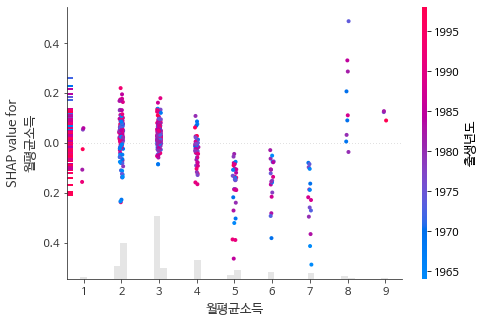

In [128]:
shap_values = explainer(X_test_encoded)

shap.initjs()
shap.plots.scatter(shap_values[:,"월평균소득"], color=shap_values)

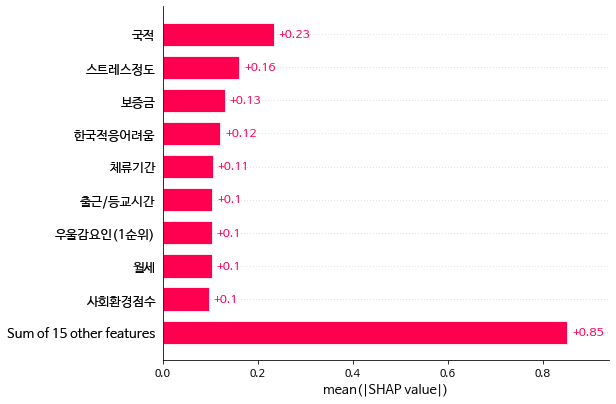

In [129]:
shap.plots.bar(shap_values)

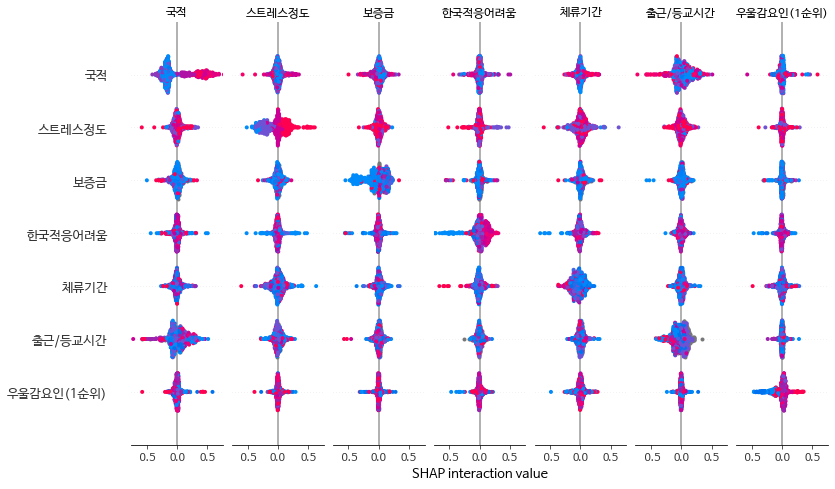

In [130]:
plt.rc('font', size=10)
shap_interaction_values = explainer.shap_interaction_values(X_test_encoded)
shap.summary_plot(shap_interaction_values, X_test_encoded)

In [131]:
n=77
print(y_test.iloc[[n]].values)
boosting.predict(X_test_encoded.iloc[[n]])[0]

[5]


5.6885986

In [132]:
# n=157
# print(y_test.iloc[[n]])
# model3.predict(X_test.iloc[[n]])

In [133]:
# X_test_num=X_test[['출생년도','보증금','월세','스트레스정도','성별','건강상태','월평균소득','체류기간','출근/등교시간','한국어능력','사회환경점수','한국적응어려움','행복지수']]
# X_train_num=X_train[['출생년도','보증금','월세','스트레스정도','성별','건강상태','월평균소득','체류기간','출근/등교시간','한국어능력','사회환경점수','한국적응어려움','행복지수']]

# encoder = OrdinalEncoder()
# X_train_encoded = encoder.fit_transform(X_train_num) # 학습데이터
# X_test_encoded = encoder.transform(X_test_num) # 검증데이터

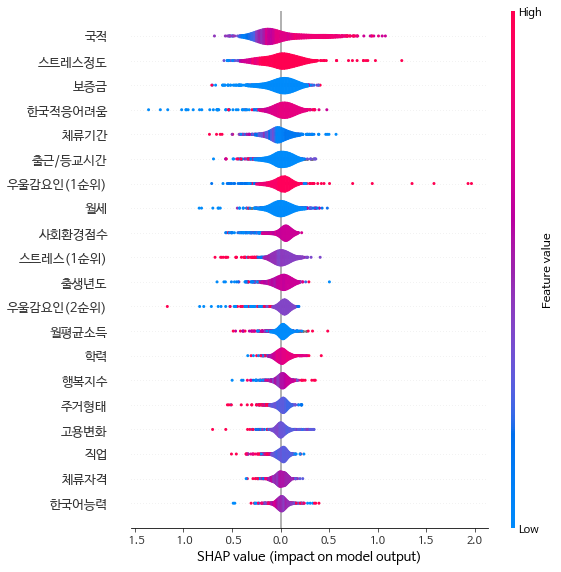

In [134]:
shap.summary_plot(shap_values, X_test_encoded, plot_type="violin")

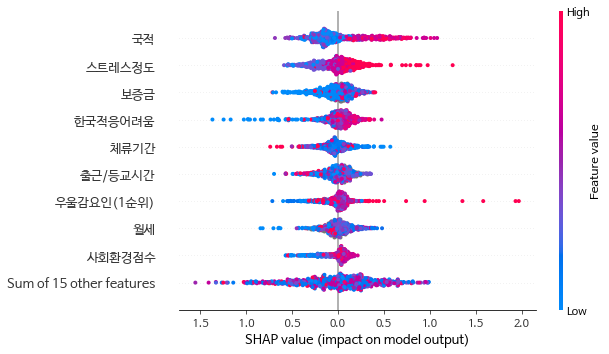

In [135]:
shap.plots.beeswarm(shap_values)

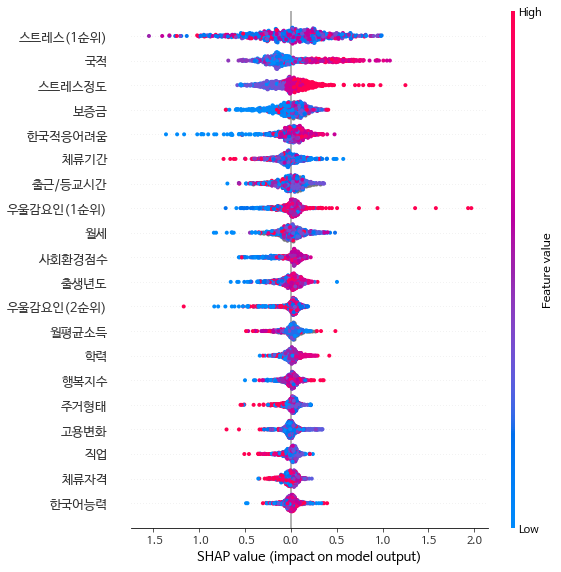

In [136]:
# shap_values = explainer.shap_values(X_test_encoded)
shap.summary_plot(shap_values, X_test_encoded)

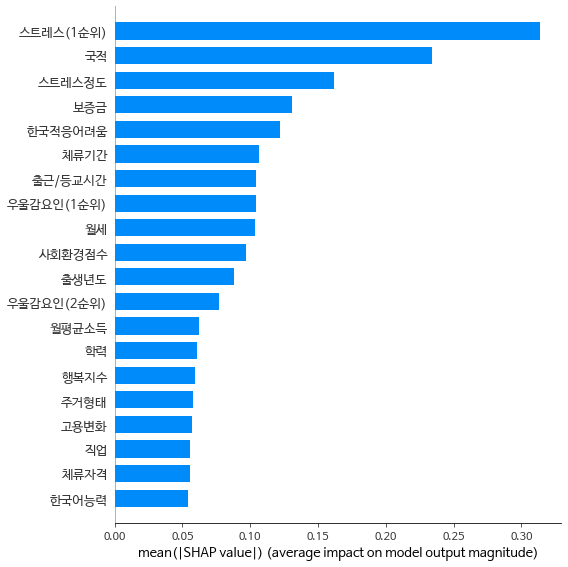

In [137]:
shap.summary_plot(shap_values, X_test_encoded, plot_type = "bar")